# Practical Exercise 4
## Principal Component Analysis and Reinforcement Learning
*The goal of this practical exercise is to implement Reinforcement Learning algorithm based on Q-learning approach and Bellman equation implementation for Q-values. Furthermore,
additionally PCA is utilized to attempt to reduce dimensionality and potentially improve
performance.*

In [ ]:
# Task One
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score

dataset = sio.loadmat("/content/sample_data/digitsDataE.mat")
X = dataset['X']
Y = dataset['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Y_train_enc = to_categorical(Y_train, num_classes=10)

def dispResults(model, X_test, Y_test, h):
    Y_pred_probs = model.predict(X_test)
    Y_pred = np.argmax(Y_pred_probs, axis=-1)

    accuracy_test = accuracy_score(Y_test, Y_pred)
    print('Test Accuracy: %.2f' % accuracy_test)

    acc_key = 'accuracy' if 'accuracy' in h.history else 'acc'
    print('Final Training Accuracy: %.2f' % h.history[acc_key][-1])

    plt.figure(figsize=(7, 3), dpi=100)
    plt.plot(h.history['loss'])
    plt.xlabel('Iteration (Epochs)')
    plt.ylabel('Cost Function (Loss)')
    plt.title('Cost Function Dynamics')
    plt.grid()
    plt.show()

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1007 - loss: 2.3532
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1062 - loss: 2.3003
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1210 - loss: 2.2680
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1840 - loss: 2.2407
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2840 - loss: 2.2166
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3558 - loss: 2.1990 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4473 - loss: 2.1735
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4826 - loss: 2.1570
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5306 - loss: 2.1328
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5720 - loss: 2.1127
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6018 - loss: 2.0909 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

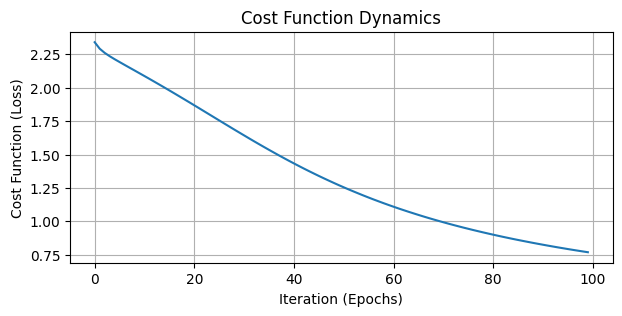

In [ ]:
# Task Two
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

LearnRate = 0.05
BtchSize = 400
Optimizer = SGD(learning_rate=LearnRate)

model1 = Sequential()
model1.add(Input(shape=(input_layer_size,)))
model1.add(Dense(hidden_layer_size, activation='sigmoid'))
model1.add(Dense(num_labels, activation='sigmoid'))

model1.compile(loss='categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

h1 = model1.fit(X_train, Y_train_enc, epochs=100, batch_size=BtchSize, verbose=1)

dispResults(model1, X_test, Y_test, h1)

The model uses Sigmoid activation functions for both hidden and output layers. The convergence with SGD is observed to be relatively slow, and the cost function decreases gradually.

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1091 - loss: 2.3579  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2391 - loss: 2.1525 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4168 - loss: 1.9922 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5604 - loss: 1.8209 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6428 - loss: 1.6655 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7084 - loss: 1.5007 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7341 - loss: 1.3641 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7801 - loss: 1.2238 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7930 - loss: 1.1190 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8101 - loss: 1.0236 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8153 - loss: 0.9593 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

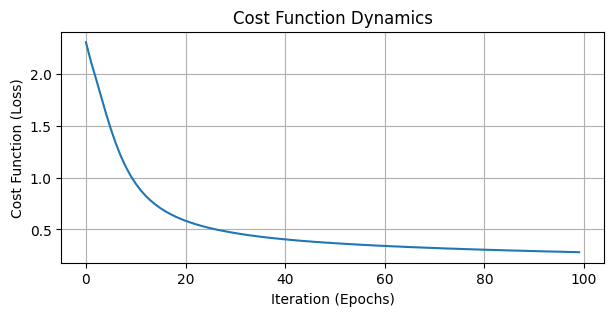

In [ ]:
# Task Three
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

LearnRate = 0.05
BtchSize = 400
Optimizer = SGD(learning_rate=LearnRate)

model2 = Sequential()
model2.add(Input(shape=(input_layer_size,)))
model2.add(Dense(hidden_layer_size, activation='relu'))
model2.add(Dense(num_labels, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

h2 = model2.fit(X_train, Y_train_enc, epochs=100, batch_size=BtchSize, verbose=1)

dispResults(model2, X_test, Y_test, h2)

Changing the activation functions to ReLU and Softmax significantly improves the learning process. We expect to see higher accuracy and faster convergence compared to Model 1.

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2462 - loss: 2.9819  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6614 - loss: 0.9748 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8008 - loss: 0.5896 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7925 - loss: 0.6389 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8392 - loss: 0.4912 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8703 - loss: 0.3962 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8754 - loss: 0.3679 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8508 - loss: 0.4929 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8930 - loss: 0.3212 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9060 - loss: 0.3040 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9153 - loss: 0.2638 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

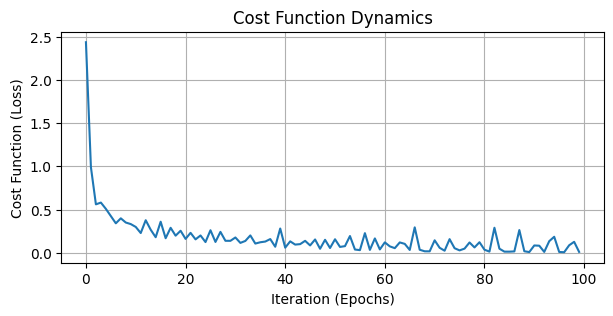

In [ ]:
# Task Four
model2_rms = Sequential()
model2_rms.add(Input(shape=(input_layer_size,)))
model2_rms.add(Dense(hidden_layer_size, activation='relu'))
model2_rms.add(Dense(num_labels, activation='softmax'))

LearnRate = 0.05
BtchSize = 400
Optimizer = RMSprop(learning_rate=LearnRate)

model2_rms.compile(loss='categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

h3 = model2_rms.fit(X_train, Y_train_enc, epochs=100, batch_size=BtchSize, verbose=1)

dispResults(model2_rms, X_test, Y_test, h3)

Using RMSprop instead of SGD results in much faster convergence. It adapts the learning rate for each parameter. But with a high learning rate the cost function show some oscillations.

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1722 - loss: 2.2200  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4300 - loss: 1.8853 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5619 - loss: 1.5936 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6595 - loss: 1.3450 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7315 - loss: 1.1397 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7844 - loss: 0.9615 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8029 - loss: 0.8559 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8352 - loss: 0.7275
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8508 - loss: 0.6540 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8644 - loss: 0.5922
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8690 - loss: 0.5432 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

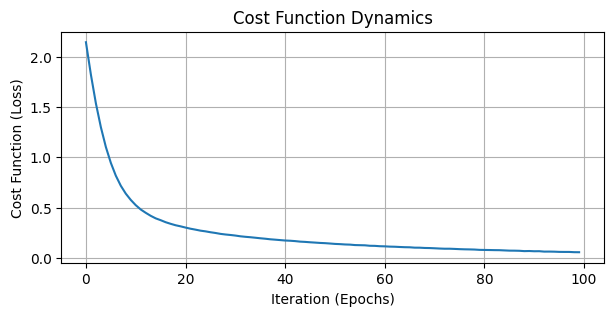

In [ ]:
# Task Five
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

LearnRate = 0.001
BtchSize = 400
Optimizer = RMSprop(learning_rate=LearnRate)

model3 = Sequential()
model3.add(Input(shape=(input_layer_size,)))
model3.add(Dense(hidden_layer_size, activation='relu'))
model3.add(Dense(hidden_layer_size, activation='relu'))
model3.add(Dense(num_labels, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

h4 = model3.fit(X_train, Y_train_enc, epochs=100, batch_size=BtchSize, verbose=1)

dispResults(model3, X_test, Y_test, h4)

Model 3 introduces a deeper architecture with two hidden layers. We can achieve the highest accuracy among all tasks.